In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('energydata.csv')

data["energy"] = data["Appliances"] + data["lights"]

# Remove "Appliances" and "lights" columns
data = data.drop(['Appliances', 'lights'], axis=1)


Missing Values:
 date           0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
energy         0
dtype: int64
Number of outliers exceeding 800 in energy column: 0


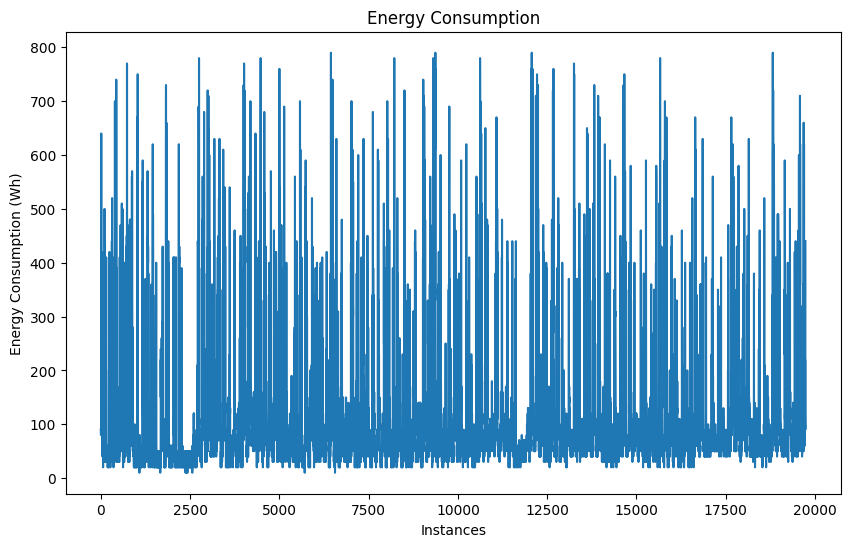

In [43]:
#Calculating Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing data
data = data.dropna()  # Remove rows with missing values

#Calculating the Outliers
outliers = data[data['energy'] > 800]
num_outliers = len(outliers)
print("Number of outliers exceeding 800 in energy column:", num_outliers)

#Plotting to check outliers
plt.figure(figsize=(10, 6))
plt.plot(data['energy'])
plt.xlabel('Instances')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption')
plt.show()

data = data[(data['energy'] > 0) & (data['energy'] < 800)]  # Remove outliers


In [33]:
data.head()

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,energy
0,2016-01-11 17:00:00,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,90
1,2016-01-11 17:10:00,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,90
2,2016-01-11 17:20:00,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,80
3,2016-01-11 17:30:00,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,90
4,2016-01-11 17:40:00,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,100


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19716 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19716 non-null  object 
 1   T1           19716 non-null  float64
 2   RH_1         19716 non-null  float64
 3   T2           19716 non-null  float64
 4   RH_2         19716 non-null  float64
 5   T3           19716 non-null  float64
 6   RH_3         19716 non-null  float64
 7   T4           19716 non-null  float64
 8   RH_4         19716 non-null  float64
 9   T5           19716 non-null  float64
 10  RH_5         19716 non-null  float64
 11  T6           19716 non-null  float64
 12  RH_6         19716 non-null  float64
 13  T7           19716 non-null  float64
 14  RH_7         19716 non-null  float64
 15  T8           19716 non-null  float64
 16  RH_8         19716 non-null  float64
 17  T9           19716 non-null  float64
 18  RH_9         19716 non-null  float64
 19  T_ou

In [35]:
data.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,energy
count,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,...,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000,19716.000000
mean,21.686980,40.259511,20.340949,40.422347,22.267856,39.242607,20.855894,39.026637,19.592958,50.952956,...,41.552693,7.412652,755.519531,79.751716,4.040044,38.324263,3.761847,24.985114,24.985114,100.752181
std,1.605621,3.979444,2.192545,4.069967,2.004908,3.254987,2.042604,4.341894,1.844282,9.024509,...,4.151760,5.316658,7.398788,14.903304,2.451356,11.794548,4.194261,14.497247,14.497247,101.600069
min,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,10.000000
25%,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,18.288750,45.400000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.490997,12.490997,50.000000
50%,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,...,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.891900,24.891900,60.000000
75%,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.611905,53.672292,...,44.345000,10.404167,760.933333,91.666667,5.500000,40.000000,6.566667,37.582646,37.582646,100.000000
max,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,...,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,790.000000


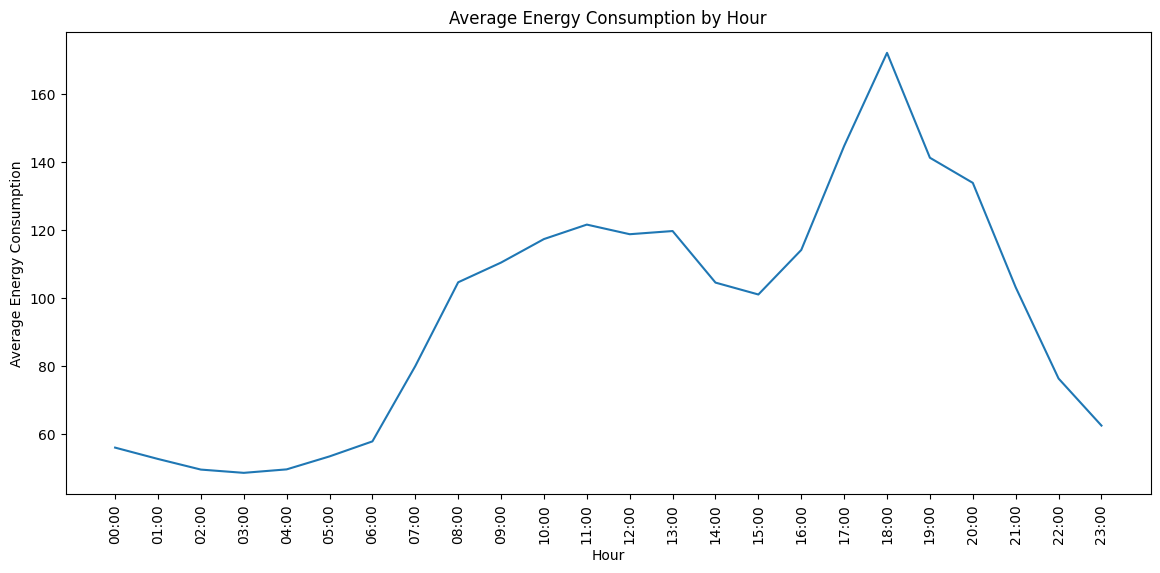

In [12]:
#Exploratory Data Analysis, showing user behaviour pattern

data_EDA = data.copy()

data_EDA['date'] = pd.to_datetime(data_EDA['date'])
data_EDA.set_index('date', inplace=True)
data_EDA = data_EDA.resample('1H').mean()
data_EDA.reset_index(inplace=True)

#Splitting Date into Month, Year, Date, Time and Day
data_EDA['Month'] = data_EDA['date'].dt.month
data_EDA['Year'] = data_EDA['date'].dt.year
data_EDA['Date'] = data_EDA['date'].dt.date
data_EDA['Time'] = data_EDA['date'].dt.strftime('%H:%M:%S')
data_EDA['Day'] = data_EDA['date'].dt.day_name()

#Calculating mean of energy consumption in a given hour
hourly_energy = data_EDA.groupby('Time')['energy'].mean()
hourly_energy_sorted = hourly_energy.sort_values(ascending=False)

hourly_energy = data_EDA.groupby(data_EDA['date'].dt.hour)['energy'].mean()

# Create a range of hourly timestamps from 00:00 to 23:00
hours = pd.date_range(start='00:00', end='23:00', freq='H').strftime('%H:%M').tolist()

# Reindex the hourly energy consumption to ensure all hours are included
hourly_energy_sorted = hourly_energy.reindex(range(24), fill_value=0)

plt.figure(figsize=(14, 6))
plt.plot(hours, hourly_energy_sorted)
plt.xlabel('Hour')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption by Hour')
plt.xticks(rotation='vertical')
plt.show()


In [13]:
# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'energy' ], axis=1)
y = data['energy']  # Using the modified "energy" column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_pred = linear_reg.predict(X_test_scaled)

# Decision Tree Regression model with hyperparameter tuning
tree_reg = DecisionTreeRegressor(random_state=42)
tree_param_grid = {'max_depth': [None, 5, 10, 15],
                   'min_samples_split': [2, 5, 10]}
tree_reg_cv = GridSearchCV(tree_reg, tree_param_grid, scoring='neg_mean_absolute_error', cv=5)
tree_reg_cv.fit(X_train_scaled, y_train)
tree_reg_pred = tree_reg_cv.predict(X_test_scaled)

# Random Forest Regression model with hyperparameter tuning
forest_reg = RandomForestRegressor(random_state=42)
forest_param_grid = {'n_estimators': [100, 200, 300],
                     'max_depth': [None, 5, 10],
                     'min_samples_split': [2, 5]}

forest_reg_cv = RandomizedSearchCV(forest_reg, forest_param_grid, n_iter=10,
                                   scoring='neg_mean_absolute_error', cv=5, random_state=42)
forest_reg_cv.fit(X_train_scaled, y_train)
forest_reg_pred = forest_reg_cv.predict(X_test_scaled)


In [14]:
# Evaluate the models
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
tree_reg_mae = mean_absolute_error(y_test, tree_reg_pred)
forest_reg_mae = mean_absolute_error(y_test, forest_reg_pred)

linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
tree_reg_rmse = np.sqrt(mean_squared_error(y_test, tree_reg_pred))
forest_reg_rmse = np.sqrt(mean_squared_error(y_test, forest_reg_pred))

linear_reg_r2 = r2_score(y_test, linear_reg_pred)
tree_reg_r2 = r2_score(y_test, tree_reg_pred)
forest_reg_r2 = r2_score(y_test, forest_reg_pred)

# Print best parameters for decision tree and random forest
print('Decision Tree Regression Best Parameters:', tree_reg_cv.best_params_)
print('Random Forest Regression Best Parameters:', forest_reg_cv.best_params_)



Decision Tree Regression Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Random Forest Regression Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': None}


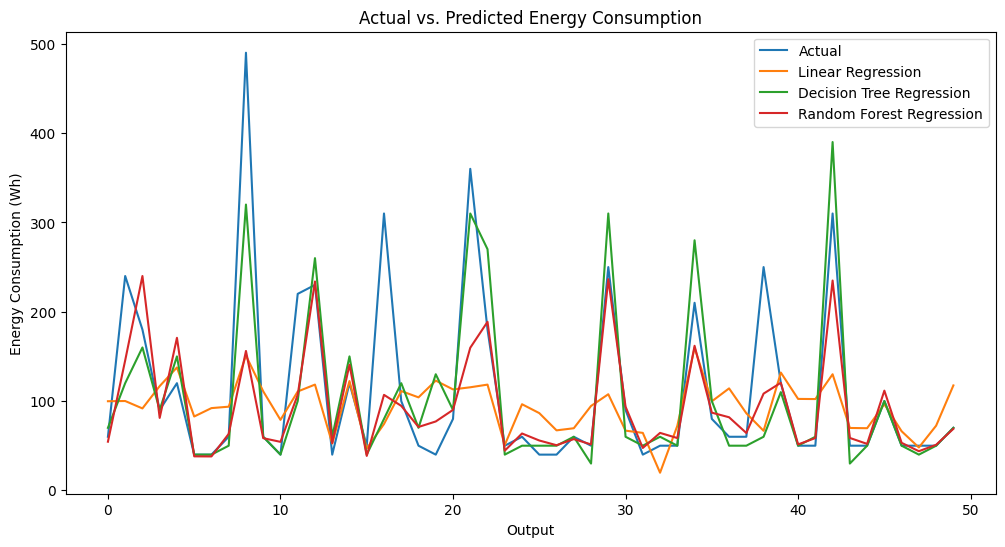

In [37]:
#Plotting comparision of all models outputs V/s Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(linear_reg_pred[:50], label='Linear Regression')
plt.plot(tree_reg_pred[:50], label='Decision Tree Regression')
plt.plot(forest_reg_pred[:50], label='Random Forest Regression')
plt.xlabel('Output')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

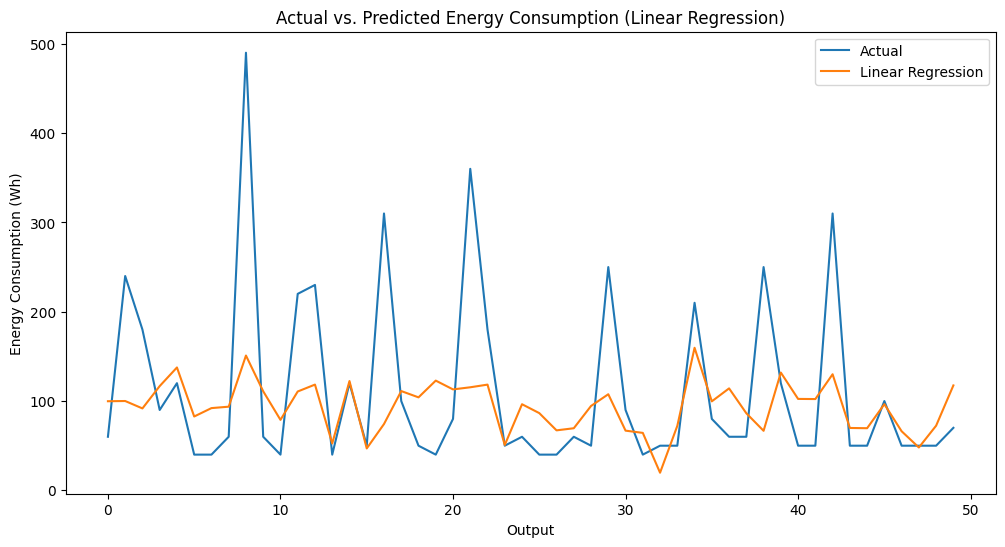

In [38]:
# Plotting actual vs. predicted values for Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(linear_reg_pred[:50], label='Linear Regression')
plt.xlabel('Output')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Actual vs. Predicted Energy Consumption (Linear Regression)')
plt.legend()
plt.show()

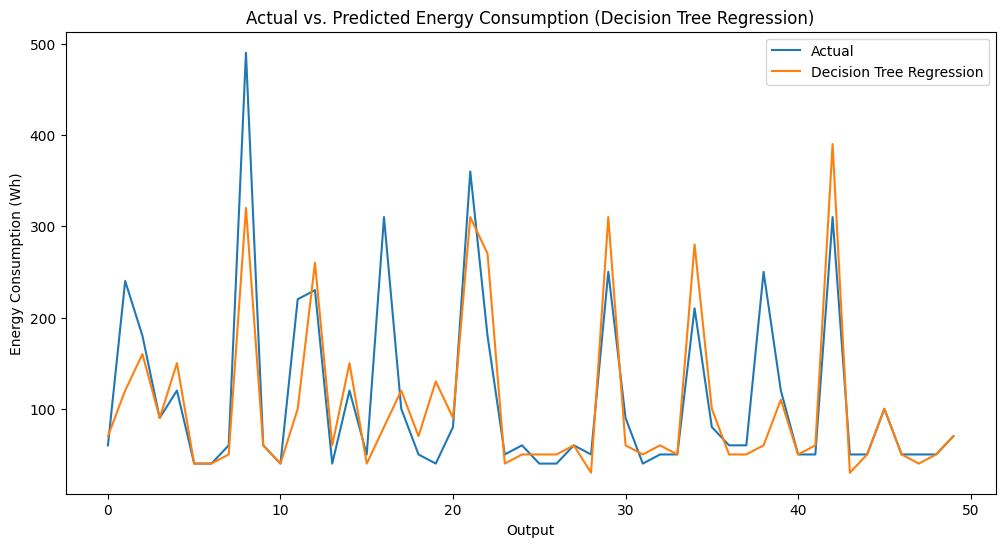

In [39]:
# Plotting actual vs. predicted values for Decision Tree Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(tree_reg_pred[:50], label='Decision Tree Regression')
plt.xlabel('Output')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Actual vs. Predicted Energy Consumption (Decision Tree Regression)')
plt.legend()
plt.show()

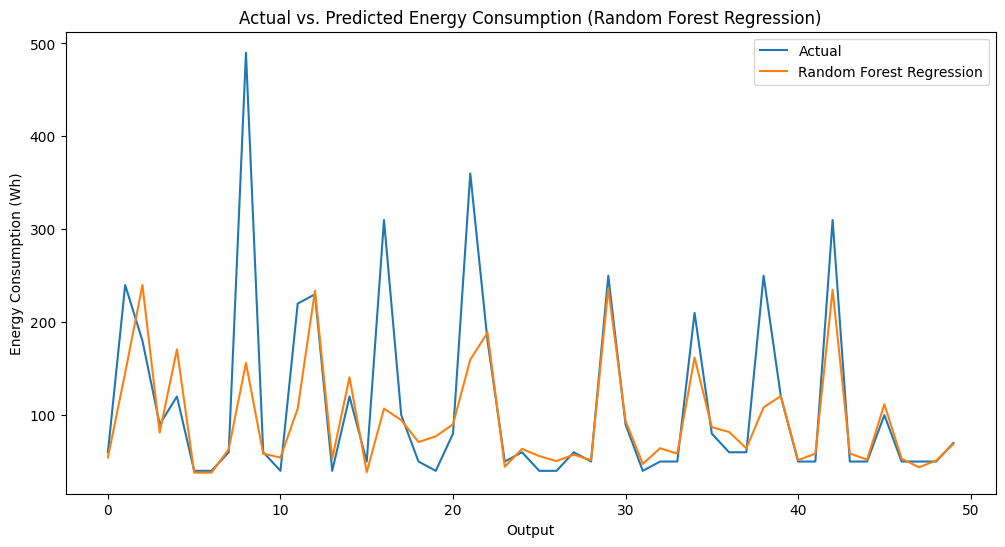

In [40]:
# Plotting actual vs. predicted values for Random Forest Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(forest_reg_pred[:50], label='Random Forest Regression')
plt.xlabel('Output')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Actual vs. Predicted Energy Consumption (Random Forest Regression)')
plt.legend()
plt.show()



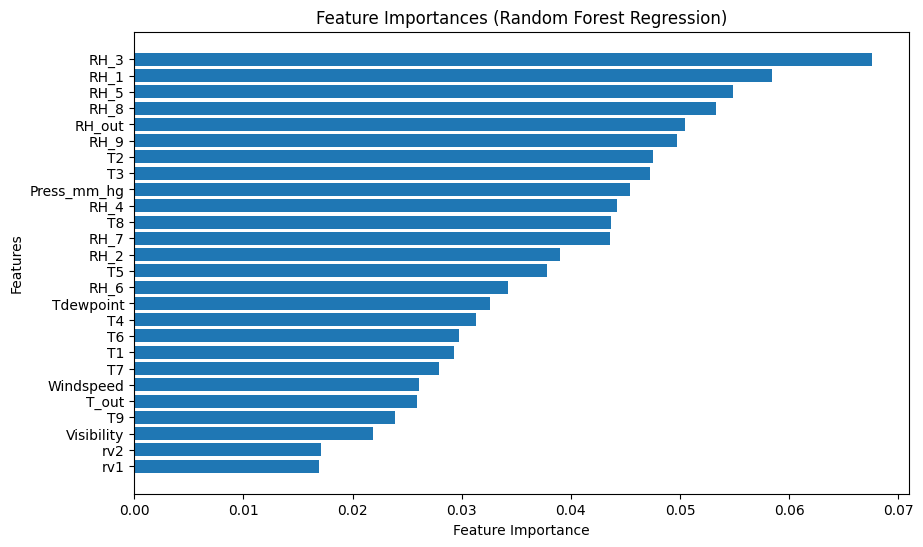

Linear Regression MAE: 45.05087756265125
Decision Tree Regression MAE: 33.59660406483149
Random Forest Regression MAE: 26.551539319097845
---------------------------------------
Linear Regression RMSE: 73.98348239562355
Decision Tree Regression RMSE: 73.47681467530364
Random Forest Regression RMSE: 52.5522188513497
---------------------------------------
Linear Regression R^2: 0.17349601960923555
Decision Tree Regression R^2: 0.184777698933844
Random Forest Regression R^2: 0.5829793843947797


In [19]:
# Plotting feature importances for Random Forest Regression
feature_importances = forest_reg_cv.best_estimator_.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Random Forest Regression)')
plt.show()

# Print evaluation metrics
print('Linear Regression MAE:', linear_reg_mae)
print('Decision Tree Regression MAE:', tree_reg_mae)
print('Random Forest Regression MAE:', forest_reg_mae)
print('---------------------------------------')
print('Linear Regression RMSE:', linear_reg_rmse)
print('Decision Tree Regression RMSE:', tree_reg_rmse)
print('Random Forest Regression RMSE:', forest_reg_rmse)
print('---------------------------------------')
print('Linear Regression R^2:', linear_reg_r2)
print('Decision Tree Regression R^2:', tree_reg_r2)
print('Random Forest Regression R^2:', forest_reg_r2)
